# co@work: Robust ML Training with Conditional Gradients

In this tutorial we will go through two examples and implement versions of both (stochastic) Gradient Descent and (stochastic) Conditional Gradient Descent. Most of the code is already implemented, but you will be asked to fill in the important aspects along the way. The frameworks that we will use for these examples are [Numpy](https://www.numpy.org) and [TensorFlow](https://www.tensorflow.org). Let's get started with the first example.

# Example 1 – Predicting Apartment Cost in Numpy

In this example we will implement a simple linear regression. Before explaining the setup in more detail, we need to load some libraries.

In [1]:
import time
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

The data we will consider comes from apartments in Berlin. A vector $\bf x$ lists the size of each apartment in square-meters and a vector $\bf y$ the monthly rent in Euros. The entry $i$ of each vector always corresponds to the same apartment. Let us load the data and have a look at it.

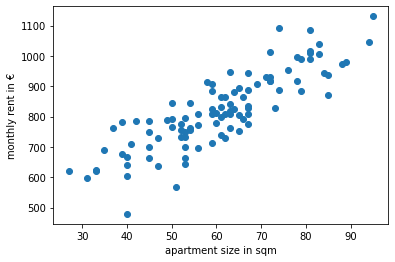

In [2]:
xvec = np.array([45, 59, 60, 74, 40, 63, 66, 63, 53, 49, 40, 54, 53, 59, 50, 35, 69, 53, 39, 72, 56, 66, 45, 60, 41, 74, 33, 56, 78, 37, 59, 63, 54, 47, 64, 39, 51, 81, 79, 52, 58, 72, 94, 71, 62, 63, 95, 84, 40, 79, 81, 85, 88, 54, 67, 72, 47, 67, 81, 65, 59, 53, 76, 52, 42, 83, 62, 67, 45, 67, 72, 61, 78, 65, 50, 62, 45, 67, 61, 53, 85, 40, 53, 56, 81, 61, 27, 33, 73, 52, 63, 61, 65, 83, 59, 31, 67, 64, 50, 89])
yvec = np.array([699, 808, 778, 888, 640, 764, 863, 818, 643, 790, 479, 844, 733, 907, 766, 690, 908, 750, 677, 1014, 771, 791, 663, 812, 709, 1091, 625, 807, 998, 764, 712, 808, 757, 638, 825, 783, 568, 1016, 990, 733, 915, 919, 1047, 931, 809, 948, 1131, 945, 605, 883, 1086, 938, 973, 763, 775, 932, 730, 887, 990, 754, 824, 699, 953, 775, 786, 1039, 729, 944, 786, 829, 919, 832, 916, 893, 846, 863, 750, 808, 739, 796, 871, 668, 665, 695, 1011, 863, 621, 622, 828, 757, 840, 800, 805, 1007, 883, 598, 834, 881, 792, 979])

fig = plt.figure(); plt.scatter(xvec, yvec);
plt.xlabel("apartment size in sqm"); plt.ylabel("monthly rent in €");

As expected, there seems to be a clear correlation between the size of an apartment and its monthly rent. We want to determine the precise nature of that relation by approximating the data using a linear function $f_{a,b}(x) = a \cdot x + b$. We want to find a combination of parameters $a,b \in \mathbb{R}$ that reduces the loss $C(a,b)$ as given by the *Mean Squared Error*

$$C_{{\bf x}, {\bf y}}(a,b) = C(a,b) = \frac{1}{n} \sum_{i = 1}^n \big( f_{a,b}(x_i) - y_i \big)^2.$$

Here $x_i$ and $y_i$ correspond to the $i$-th entries of $\bf x$ and $\bf y$ and $n$ is the length of both vectors.

### Task 1: Implement the functions $f_{a,b}$ and $C(a,b)$

Let us implement both the function $f_{a,b}$ and the loss function $C(a,b)$. Make sure that `f(x, a, b)` accepts both scalars and numpy arrays for `x` and that it returns an array of equal length. In the function `C(a, b)` you may use both `xvec` and `yvec` as we have loaded them in the previous cell as well as the function `f(x, a, b)` that you just implemented. If you are unfamiliar with Numpy arrays, you can find all the basic operations you will need summarized [here](https://scipy-lectures.org/intro/numpy/operations.html).

In [3]:
def f(x, a, b):
    return a*x + b

def C(a, b):
    mse = 0
    for i in range(len(xvec)):
        mse += (f(xvec[i], a, b) - yvec[i])**2
    mse /= len(xvec)
    return mse

Run the following cell to verify that your implementation is correct:

In [6]:
assert f(1, 2, -1) == 1
assert (f(xvec, 1, 0) == xvec).all()
assert C(1, 2) == 586722.18

Try some different parameters for $a$ and $b$ and see how well they fit the data!

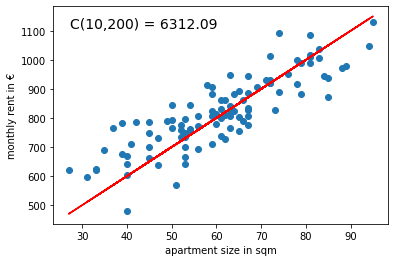

In [11]:
# TRY SOME PARAMETERS ######################
a, b = 10, 200
############################################

fig, ax = plt.subplots(); ax.scatter(xvec, yvec); ax.plot(xvec, f(xvec, a, b), color='red');
ax.set_xlabel("apartment size in sqm"); ax.set_ylabel("monthly rent in €");
ax.text(0.05, 0.95, f"C({a},{b}) = {C(a, b)}", transform=ax.transAxes, fontsize=14, verticalalignment='top');

### Task 2: Determine the partial derivatives

In order to take a Gradient Descent step, we need to determine the partial derivatives of the loss function $C(a,b)$ with respect to the parameters $a$ and $b$. Determine formulas for $\partial C / \partial a$ and $\partial C / \partial b$ and implement them below. Note that, since we will later both implement batched updates and normalize the input data, your functions should be able to determine the derivatives for arbitrary given arrays `x` and `y` and not just for the particular arrays `xvec` and `yvec`. You can again use the function `f(x, a, b)` that you just implemented.



In [12]:
def dCda(x, y, a, b):
    res = 0
    for i in range(len(x)):
        res += 2*a*(x[i]**2) + 2*x[i]*b - 2*x[i]*y[i]
    res /= len(x)
    return res
    # return np.sum(2 * x * (f(x, a, b)-y)) / len(y)

def dCdb(x, y, a, b):
    res = 0
    for i in range(len(x)):
        res += 2*a*x[i] + 2*b - 2*y[i]
    res /= len(x)
    return res
    # return np.sum(2 * (f(x, a, b)-y)) / len(y)

Run the following cell to verify that your implementation is correct:

In [13]:
assert dCda(np.array([0]), ([0]), 0, 0) == 0.0
assert dCda(xvec, yvec, 1, 0) == -94936.46
assert dCdb(np.array([0]), ([0]), 0, 0) == 0.0
assert dCdb(xvec, yvec, 2, 10) == -1377.78

### Task 3: Normalize the input data
We now have almost all the ingredients we need in order to apply Gradient Descent to our problem. As one last piece of preparation, we will need to normalize our input vector $\bf x$, that is we will subtract the mean of $\bf x$ from each entry and divide the resulting vector by its standard deviation. Written formally, we want to determine

$${\bf x}_{\text{normalized}} = \frac{{\bf x} - \sum_{i = 1}^n x_i / n}{\sqrt{ \frac{\sum_{i=1}^n(x_i -  \sum_{i = 1}^n x_i / n)^2}{n} }}.$$

Normalization is a technique that helps us use a common scale for both parameters $a$ and $b$ so that we can use a common learning rate for both. The resulting vector `xvec_normalized` should have mean value $0$ and standard deviation $1$. You can use some built-in  functionality from Numpy to make your life easier.

In [9]:
xvec_normalized = (xvec - np.mean(xvec)) / np.std(xvec)

Run the following cell to verify that your implementation is correct:

In [10]:
assert np.abs( np.mean(xvec_normalized) ) < 1e-10
assert np.std(xvec_normalized) == 1

Before proceeding to the next task, let just need to define a simple logger object to store information during intermediate steps.

In [16]:
class Logger:
    def __init__(self):
        self.loss_history = []
        self.a_history = []
        self.b_history = []
  
    def log(self, a, b):
        a_real, b_real = a / 14.90147, b - a * 60.69 / 14.90147
        self.loss_history.append(C(a_real, b_real))
        self.a_history.append(a_real)
        self.b_history.append(b_real)

    def plot(self):
        fig, ax = plt.subplots(1, 4); fig.set_size_inches(25, 4);
        ax[0].scatter(xvec, yvec); ax[0].plot(xvec, f(xvec, self.a_history[-1], self.b_history[-1]), color='red')
        ax[0].set_xlabel("apartment size in sqm"); ax[0].set_ylabel("monthly rent in €");
        ax[1].plot(range(len(self.loss_history)), self.loss_history, color='green'); 
        ax[1].set_title("loss", fontsize='large'); ax[1].set_xlabel("steps"); ax[1].set_yscale("log")
        ax[2].plot(range(len(self.a_history)), self.a_history, color='orange')
        ax[2].set_title("parameter a", fontsize='large'); ax[2].set_xlabel("steps")
        ax[3].plot(range(len(self.b_history)), self.b_history, color='orange')
        ax[3].set_title("parameter b", fontsize='large'); ax[3].set_xlabel("steps")
        plt.show()

### Task 4: Implement Gradient Descent updates

We are now ready to implement Gradient Descent, which simply takes the Gradient of the loss function, pointing in the direction of steepest incline, and takes a step in the opposite direction. Written formally, we initialize some parameters $a_0$ and $b_0$ and iteratively update them through

$$a_{t+1} = a_t - \gamma \, \partial C (a_t, b_t)/ \partial a \quad \text{and} \quad b_{t+1} = b_t - \gamma \, \partial C (a_t, b_t) / \partial b.$$

As you can see below, we have already initialized the parameters `a` and `b` to be `0` and set up a loop going over `nr_epochs = 10` epochs, that is steps $t$. The paramter $\gamma$ is called `learning_rate` and is set to `0.3`, but feel free to experiment with different values both for the learning rate and the number of epochs. An instance of `Logger` is created to store and plot the values at each iterate. Make sure you always use `xvec_normalized` instead of `xvec`!

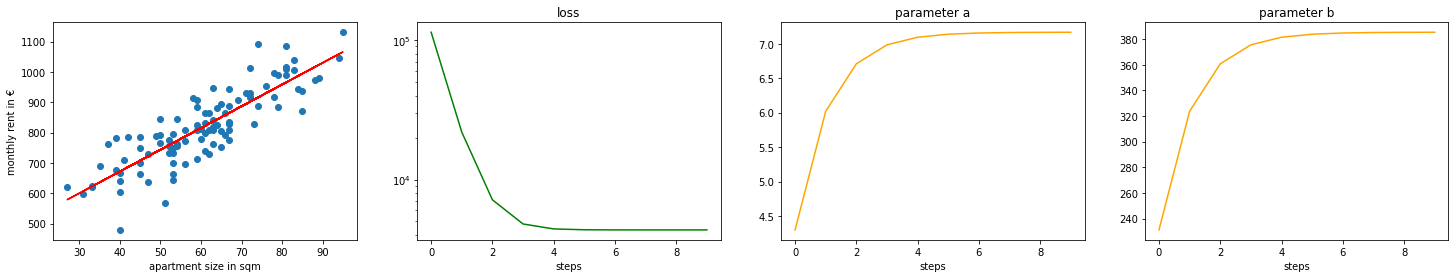

In [17]:
logger = Logger()

learning_rate = 0.3
nr_epochs = 10
a, b = 0, 0

for epoch in range(nr_epochs):
    a = a - learning_rate * dCda(xvec_normalized, yvec, a, b)
    b = b - learning_rate * dCdb(xvec_normalized, yvec, a, b)

    logger.log(a, b)

logger.plot()

You should see the loss decrease over time and the values for $a$ and $b$ to converge to around 6.8 and 378, that is for every additional square meter of living space, you should expect to pay an additional 6,80€ per month in rent.

### Task 5: Implement batched Gradient Descent updates

Finally, let us modify the previous loop slightly to implement batched Gradient Descent. Instead of determining the gradient of the loss function with respect to the entire dataset $(\bf x, \bf y)$  each time, we split our data into equally sized so-called batches $({\bf x}_0, {\bf y}_0), ..., ({\bf x}_k, {\bf y}_k)$ and update our parameters using the gradient only with respect to each individual batch. More formally, we now have an additional *inner loop* of size $k+1$ where we pass over all batches $({\bf x}_i, {\bf y}_i)$ and update our parameters as

$$a_{t+1} = a_t - \gamma \, \partial C_{{\bf x}_i, {\bf y}_i} (a_t, b_t) / \partial a \quad \text{and} \quad b_{t+1} = b_t - \gamma \, \partial C_{{\bf x}_i, {\bf y}_i} (a_t, b_t) / \partial b.$$

Besides dividing the data into several batches, you should also shuffle it at the beginning of each epoch so that you do not use the same batches each epoch. Look up `np.random.permutation` for one possible way of how to achieve this in Numpy. We have again already set up some parameters, including a batch size of 20, but feel free to experiment with different combinations. When you set `batch_size = len(yvec)`, your code should run as in the previous cell.

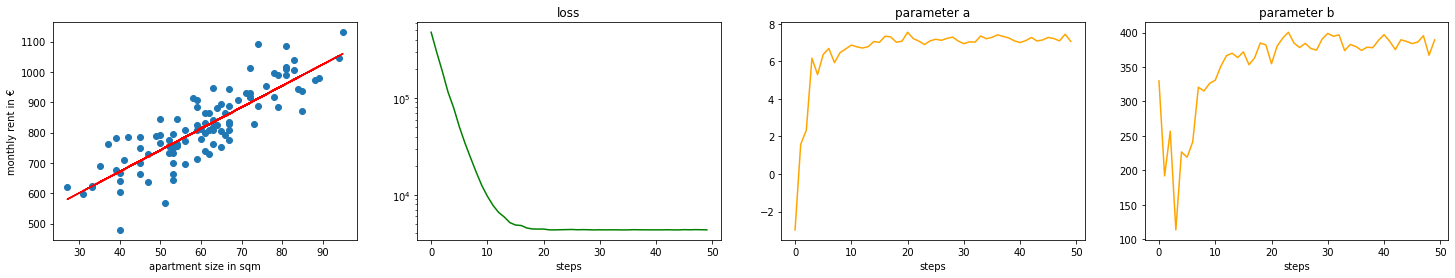

In [21]:
logger = Logger()

learning_rate = 0.1
nr_epochs = 10
batch_size = 20
a, b = 0, 0

for epoch in range(nr_epochs):
    random_permutation = np.random.permutation(len(yvec))
    xvec_normalized_shuffled = xvec_normalized[random_permutation]
    yvec_shuffled = yvec[random_permutation]

    for k in range(math.ceil(len(yvec)/batch_size)):
        x_batch = xvec_normalized_shuffled[k*batch_size:(k+1)*batch_size]
        y_batch = yvec_shuffled[k*batch_size:(k+1)*batch_size]

        a = a - learning_rate * dCda(x_batch, y_batch, a, b)
        b = b - learning_rate * dCdb(x_batch, y_batch, a, b)

        logger.log(a, b)

logger.plot()

# Example 2 – Handwriting Recognition in TensorFlow

We are now going to implement Conditional Gradient Descent for a real Machine Learning example: training a Neural Network to recognize handwritten numbers. As before, we will first load some necessary libraries.

In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

The dataset we will use is the [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist/). It is a common easy training example where even simple classifier functions can achieve very high accuracy in a short time. Let us load the dataset and have a look at it. The second of the following two cells displays five images at random from the dataset of 60 000 images. Re-run it to get five different images.

In [19]:
dataset, info = tfds.load('mnist', data_dir='./dataset', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

mnist_raw_input = next(iter(train_dataset.batch(5000)))[0] / 255

num_train_examples = info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples

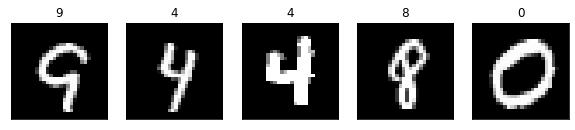

In [20]:
fig, ax = plt.subplots(1,5); fig.set_size_inches(10, 2);

for idx, (image, label) in enumerate(iter(train_dataset.shuffle(100))):
    ax[idx].imshow(np.repeat(image, 3, axis=2)); ax[idx].set_title(label.numpy())
    ax[idx].get_xaxis().set_visible(False); ax[idx].get_yaxis().set_visible(False);
    if idx == 4: break

plt.show()

Previously in the housing example we had a 1-dimensional input that we ran through a linear function with a *weight term* $a$ and a *bias term* $b$. This simple linear regression module is referred to as a *Neuron* in Machine Learning. The simple idea behind Neural Networks is to construct highly sophisticated functions by chaining and stacking a whole lot of these building blocks, each followed by a non-linear activation function such as the tanh, [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) or [relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function. 

In particular, in our handwriting example we will consider the 28x28 input matrices as vectors of length $28 \cdot 28 = 784$, so we are going from a 1- to a 784-dimensional input. We call this the *input layer* and it is connected to 64 neurons in the *hidden layer*, that is we run 64 distinct linear regressions, followed by non-linear relu activations, over each image. The resulting vector of length 64 is then connected to 10 neurons in the *output layer*, so that we ultimately end up mapping each image to a vector of length 10. There are 10 neurons in the output layer because we are trying to classify each image as one of the ten digits: the $i$-th entry of the vector will tell us the certainty of the image representing the digit $i$ where $0 \leq i \leq 9$. This output will in fact be a probability vector because we are applying a [softmax](https://en.wikipedia.org/wiki/Softmax_function) function on the output layer.

Thankfully, modern frameworks like [TensorFlow](https://www.tensorflow.org) and [Pytorch](https://pytorch.org) make constructing such networks very simple. The following short code defines a class that instantiates precisely the type of function described in the previous paragraph. Not only that, but the class also takes care of determining the partial derivatives whenever feeding in any input. The following cell also prints a simple summary of the network, which tells us that it has a total of 50 890 trainable parameters. Our previous example had 2!

### Task 1: Understanding our function

See if you can figure out why exactly our neural network has 50 890 trainable parameters.

In [22]:
class Model(tf.keras.models.Sequential):
    def __init__(self):
        super().__init__([
          # flatten the 28x28 images into vectors of length 784
          tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
          # a hidden layer with 64 neurons and relu activations
          tf.keras.layers.Dense(64, activation='relu'),
          # an output layer with 10 classes and softmax activation
          tf.keras.layers.Dense(10, activation='softmax')
        ])

print(Model().summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


Where previously we used the mean squared error, we will now use a [categorical cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) loss function. TensorFlow already has all the necessary fuctionality built into the object `tf.keras.losses.SparseCategoricalCrossentropy`. The next cell will instanciate such a loss object as well as two metrics objects that we will use to store both the loss and accuracy during epoch, that is the number of images from our dataset correctly classified.



In [23]:
# define the loss object
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# objects used to store the loss and accuracy metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')

### Task 2: Normalize input

We will again normalize our input to have zero mean and a standard deviation of one. As before, determine the values `mnist_mean` and `mnist_std`. You can use the input data in the form of the 60000x28x28x1 array `mnist_raw_input` and you may want to look up the functions `tf.math.reduce_mean` and `tf.math.reduce_std`. If you cannot figure out how to determine these values, don't worry! Normalizing isn't strictly necessary here, so you can  also just set `mnist_mean` to zero and `mnist_std` to one and proceed to the next part.

In [ ]:
# FILL ###################
# mnist_mean = 
# mnist_std  = 
#########################

def normalize(image, label):
    # cast the image to [0,1] with dtype tf.float32
    image = tf.image.convert_image_dtype(image, tf.float32)
    # normalize to mean 0 and standard deviation 1  
    image = (image - mnist_mean) / mnist_std                         
    return image, label

Let us see how our neural network performs before being trained. The following defines a training function that accepts a batch consisting of `x` and `y` and returns the corresponding ouput of the network, the associated loss and the gradient. This cell might take a few seconds to run as it determines the networks prediction for all 60 000 images in the dataset

In [ ]:
# function returning the output, loss and partial derivatives for a single given a batch (x,y)
@tf.function
def train_step(model, x, y):
    with tf.GradientTape() as tape:
        # feed the input x through the model
        output = model(x, training=True)
        # determine the loss by comparing the output to y
        loss = loss_object(y, output)

    # determine the gradient w.r.t. the loss
    grads = tape.gradient(loss, model.trainable_variables)

    return output, loss, grads


# determine the performance of an untrained network
model = Model()
for x, y in train_dataset.shuffle(num_train_examples).map(normalize).batch(64):
    output, loss, _ = train_step(model, x, y)
    train_loss.update_state(loss, sample_weight=len(y))
    train_accuracy.update_state(y, output, sample_weight=len(y))
print(f"The untrained network has a loss of {train_loss.result().numpy():.2f} and an accuracy of {train_accuracy.result().numpy()*100:.2f}%.")

The accuracy should be around 10%, which simply means that our untrained network randomly maps each image to one of the ten digits. Let's see if we can improve that! The following defines a training loop exactly as we did previously in the housing example, though this time using some of the handy shortcuts provided by TensorFlow.

In [ ]:
import time

def train(model, optimizer, nepochs=5, batch_size=64):
    for epoch in range(nepochs):
        t = time.time()
        # reset metrics at beginning of each epoch
        train_loss.reset_states()
        train_accuracy.reset_states()

        # normalize, shuffle and batch the input data
        shuffled_batched_dataset = train_dataset.map(normalize).shuffle(num_train_examples).batch(batch_size)

        # train loop
        for x, y in shuffled_batched_dataset:
            # get the predicted output, associated loss and partial derivatives for the current batch (x,y)
            output, loss, grads = train_step(model, x, y)

            # update the loss and accuracy metrics
            train_loss.update_state(loss, sample_weight=len(y))
            train_accuracy.update_state(y, output, sample_weight=len(y))

            # use the partial derivatives to update our network
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # print metrics of current epoch
        print(time.time() - t)
        print(f"{epoch + 1}) loss {train_loss.result().numpy():.2f} and accuracy {train_accuracy.result().numpy()*100:.2f}%")

### Task 3: Train the network using Gradient Descent

Stochastic Gradient Descent is already implemented in TensorFlow in the form of `tf.keras.optimizers.SGD`. Note though that you still have to specify your own learning rate! In the following cell, instanciate the model and the optimizer and use the just defined `train` function to train the network using the optimizer. We have already suggested some values for the batch size, learning rate and number of epochs, but feel free to experiment!

In [ ]:
learning_rate = 0.1
nepochs = 5
batch_size = 64

# FILL ###################################
# sgd_trained_model = ...
# sgd_optimizer = ...
# train(...)
##########################################

Even withing the first epoch you can see an accuracy of over 90%!

### Task 4: Implement stochastic Conditional Gradient Descent

We are now ready to implement Conditional Gradient Descent. Recall that given some differentiable function $f$ that we want to minimize and a feasible region $\mathcal{D}$ in which our trainable parameters ${\bf w}_t$ must lie, Conditional Gradient Descent first determines the $\bf v \in \mathcal{D}$ that minimizes

$$\langle {\bf v}, \nabla f ({\bf w}_t)\rangle.$$

Conditional Gradient Descent then updates the parameters by taking a step towards $\bf v$, that is 

$${\bf w}_{t+1} = {\bf w}_t + \gamma ({\bf v} - {\bf w}_t).$$

Here $\gamma$ usually is set to be $2/(t+1)$, though for us it will be a constant `learning_rate` that needs to be between $0$ and $1$.



The feasible region $\mathcal{D}$ we will use here is a very simple one: the unit hypercube, that is $\mathcal{D} = \{{\bf x} : ||{\bf x}||_\infty \leq 1\}$. You should first derive a closed formula for how to determine $\text{argmin}_{{\bf v} \in \mathcal{D}}\langle {\bf v}, \nabla f ({\bf w}_t)\rangle$ when $\mathcal{D}$ is the unit hypercube. You should then implement the update in the following code skeleton below. We are relying on the TensorFlow optimizer template `tf.keras.optimizers.Optimizer`. This might look intimidating at first, but the only thing you need to implement happens in the method `resource_apply_dense`. Determine $\bf v$ minimizing $\langle {\bf v}, \nabla f ({\bf w}_t)\rangle$ over $\mathcal{D}$ using the gradient `grad` and then update the weights $\bf w$ which are stored in the variable `var`. You may need to use the functions `tf.sign` and `tf.cast` and in order to update `var`, TensorFlow will require you to use `.assign` or `.assign_sub` instead of assigning a value through `=` as you normally would.

In [ ]:
class CGD(tf.keras.optimizers.Optimizer):

    def __init__(self, learning_rate=0.03, name="CGD"):
        super().__init__(name)
        self._set_hyper("learning_rate", learning_rate)

    def _resource_apply_dense(self, grad, var, apply_state):
        lr = self._get_hyper('learning_rate')

        # FILL ##############
        # v = ...
        # return var.assign( ... )
        ##################### 

    def get_config(self):
        config = super().get_config()
        config.update({ "learning_rate": self._serialize_hyperparameter("learning_rate") })
        return config

### Task 5: Train the network using Conditional Gradient Descent

You can now train a model using Conditional Gradient Descent exactly the same way you did before.

In [ ]:
learning_rate = 0.001
nepochs = 5
batch_size = 64

# FILL ##############
# cgd_trained_model = ...
# cgd_optimizer = ...
# train(...)
##################### 

## Additional Exercises

### Task 1: Taking more features into account in Example 1

Imagine that you obtained additional information about the apartments in Example 1. On top of the size of the apartment, you now know the distance of each apartment to the nearest U-Bahn, S-Bahn or bus station in minutes. Can you optimize the parameters a linear function taking both features as an input? How much does it improve the accuracy? The additional data is given below, you may reuse any of the code from Example 1.

In [ ]:
distances_vec = np.array([1, 11, 12, 17, 14, 8, 16, 10, 19, 11, 12, 10, 8, 1, 18, 13, 6, 7, 15, 1, 15, 8, 13, 6, 19, 3, 4, 6, 9, 8, 6, 12, 10, 17, 18, 17, 1, 13, 15, 11, 1, 6, 12, 11, 9, 7, 2, 18, 4, 12, 7, 13, 18, 7, 11, 18, 4, 8, 5, 2, 16, 3, 8, 6, 10, 9, 8, 4, 13, 6, 15, 6, 5, 7, 6, 18, 16, 15, 7, 1, 14, 12, 13, 12, 11, 16, 2, 7, 14, 4, 13, 10, 10, 1, 6, 18, 19, 17, 5, 13])

### Task 2: Try out different Networks in Tensorflow

If you already have some familiarity with Neural Networks and Machine Learning, then you should try out different network designs in Example 2. Can you train a Convolutional Neural Network? You may find this overview of layers already implemented in Keras helpful: [link](https://keras.io/api/layers/).